In [1]:
# %%capture
# !pip install keras-tuner mne
# !pip install pydot 
# !pip installgraphviz
from eeg import clean_filter_epoch as c
from model import model as m
import time
import pickle as pk
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,GridSearchCV,cross_val_score,cross_validate,train_test_split,RepeatedKFold
import mne
import pywt
from keras.utils.vis_utils import model_to_dot,plot_model
import pandas as pd

# Raw signal in the DB is processed and pickled out below :

In [3]:
dirName = 'H:\\ray\\Dessertation\\DATA\\new\\'
pickle_path = 'H:\\ray\\Dessertation\\DATA\\new'
fileList = os.listdir(dirName)
print(fileList)
runner = c(dirName,pickle_path)
data = runner.pre_process_main()

['sub_15_sess_1', 'sub_15_sess_2']
H:\ray\Dessertation\DATA\new\      success
enter 1   sub_15_sess_1
enter 2
index error maybe
enter 2
enter 3
['sub', '15', 'sess', '1']
This path :  H:\ray\Dessertation\DATA\new\sub_15_sess_1/sub_15_sess_1.set
Reading H:\ray\Dessertation\DATA\new\sub_15_sess_1\sub_15_sess_1.fdt
Reading 0 ... 3452906  =      0.000 ...  3371.979 secs...


C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:288: RuntimeWarning: Data file name in EEG.data (sub15_sess1.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub_15_sess_1.fdt).
  raw = read_raw_eeglab(path,preload=True, eog=eog)
C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:288: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['HEOGR', 'HEOGL', 'VEOGU', 'VEOGL']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(path,preload=True, eog=eog)


Sample rate of the data is: 1024.0 Hz. It should be 1024 Hz


C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:274: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads(reset_bads=False)  # interpolate for the bad channel to fill in the missing data


--------------CLEANED--------------------
data del, RAM released
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 50.88 Hz)
- Filter length: 6759 samples (6.601 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff fr

C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:81: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  imagine_orthographic_epochs = epochs_sub[['imag_flower_t', 'imag_guitar_t', 'imag_penguin_t']].crop(tmin=-2, tmax =4)
C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:82: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  imagine_pictorial_epochs = epochs_sub[['imag_flower_p', 'imag_guitar_p', 'imag_penguin_p']].crop(tmin=-2, tmax =4)
C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:83: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  imagine_audio_epochs = epochs_sub[['imag_flower_s', 'imag_guitar_s', 'imag_penguin_s']].crop(tmin=-2, tmax =4)
C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:84: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  perception_orthographic_epochs = epochs_sub[['perc_flower_t', 'perc_guitar_t', 'perc_penguin_t']].crop(tmin=-2, tmax =3)
C:\User

Dropped 3 epochs: 14, 21, 27
Dropped 3 epochs: 29, 73, 74
Dropped 5 epochs: 29, 71, 74, 106, 107
Dropped 3 epochs: 12, 21, 27
Dropped 4 epochs: 29, 73, 74, 108
Dropped 5 epochs: 29, 71, 74, 106, 107
Dump successfull :  ['CWT_dict15_1.pkl', 'sub_15_sess_1', 'sub_15_sess_2']
enter 1   sub_15_sess_2
enter 2
index error maybe
enter 2
enter 3
['sub', '15', 'sess', '2']
This path :  H:\ray\Dessertation\DATA\new\sub_15_sess_2/sub_15_sess_2.set
Reading H:\ray\Dessertation\DATA\new\sub_15_sess_2\sub_15_sess_2.fdt
Reading 0 ... 5155593  =      0.000 ...  5034.759 secs...


C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:288: RuntimeWarning: Data file name in EEG.data (sub15_sess2.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub_15_sess_2.fdt).
  raw = read_raw_eeglab(path,preload=True, eog=eog)
C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:288: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['HEOGR', 'HEOGL', 'VEOGU', 'VEOGL']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(path,preload=True, eog=eog)


Sample rate of the data is: 1024.0 Hz. It should be 1024 Hz


C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:274: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads(reset_bads=False)  # interpolate for the bad channel to fill in the missing data


--------------CLEANED--------------------
data del, RAM released
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 50.88 Hz)
- Filter length: 6759 samples (6.601 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff fr

C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:81: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  imagine_orthographic_epochs = epochs_sub[['imag_flower_t', 'imag_guitar_t', 'imag_penguin_t']].crop(tmin=-2, tmax =4)
C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:82: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  imagine_pictorial_epochs = epochs_sub[['imag_flower_p', 'imag_guitar_p', 'imag_penguin_p']].crop(tmin=-2, tmax =4)
C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:83: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  imagine_audio_epochs = epochs_sub[['imag_flower_s', 'imag_guitar_s', 'imag_penguin_s']].crop(tmin=-2, tmax =4)
C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:84: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  perception_orthographic_epochs = epochs_sub[['perc_flower_t', 'perc_guitar_t', 'perc_penguin_t']].crop(tmin=-2, tmax =3)
C:\User

Dropped 0 epochs: 
Dropped 0 epochs: 
Dropped 0 epochs: 
Dropped 0 epochs: 
Dropped 0 epochs: 
Dropped 0 epochs: 
Dump successfull :  ['CWT_dict15_1.pkl', 'CWT_dict15_2.pkl', 'sub_15_sess_1', 'sub_15_sess_2']
CWT_dict :


H:\ray\Dessertation\DATA\new\      success
enter 1   sub_12_sess_2
enter 2
index error maybe
enter 2
enter 3
['sub', '12', 'sess', '2']
This path :  H:\ray\Dessertation\DATA\new\sub_12_sess_2/sub_12_sess_2.set
Reading H:\ray\Dessertation\DATA\new\sub_12_sess_2\sub_12_sess_2.fdt


C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:34: RuntimeWarning: Data file name in EEG.data (sub12_sess2.fdt) is incorrect, the file name must have changed on disk, using the correct file name (sub_12_sess_2.fdt).
  raw = read_raw_eeglab(path,preload=True, eog=eog)


Reading 0 ... 4732974  =      0.000 ...  4622.045 secs...


C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:34: RuntimeWarning: Not setting positions of 4 eog channels found in montage:
['HEOGR', 'HEOGL', 'VEOGU', 'VEOGL']
Consider setting the channel types to be of EEG/sEEG/ECoG/DBS/fNIRS using inst.set_channel_types before calling inst.set_montage, or omit these channels when creating your montage.
  raw = read_raw_eeglab(path,preload=True, eog=eog)


Sample rate of the data is: 1024.0 Hz. It should be 1024 Hz


C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:86: RuntimeWarning: No bad channels to interpolate. Doing nothing...
  raw.interpolate_bads(reset_bads=False)  # interpolate for the bad channel to fill in the missing data


--------------CLEANED--------------------
data del, RAM released
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 50.88 Hz)
- Filter length: 6759 samples (6.601 sec)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff fr

C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:270: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  imagine_orthographic_epochs = epochs_sub[['imag_flower_t', 'imag_guitar_t', 'imag_penguin_t']].crop(tmin=-2, tmax =4)
C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:271: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  imagine_pictorial_epochs = epochs_sub[['imag_flower_p', 'imag_guitar_p', 'imag_penguin_p']].crop(tmin=-2, tmax =4)
C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:272: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  imagine_audio_epochs = epochs_sub[['imag_flower_s', 'imag_guitar_s', 'imag_penguin_s']].crop(tmin=-2, tmax =4)
C:\Users\Rayha\Desktop\Dissertation DT\eeg.py:273: RuntimeWarning: tmin is not in epochs time interval. tmin is set to epochs.tmin
  perception_orthographic_epochs = epochs_sub[['perc_flower_t', 'perc_guitar_t', 'perc_penguin_t']].crop(tmin=-2, tmax =3)
C:\

Dropped 0 epochs: 
Dropped 0 epochs: 
Dropped 0 epochs: 
Dropped 0 epochs: 
Dropped 0 epochs: 
Dropped 0 epochs: 
Dump successfull :  ['sub_12_sess_2', 'sub_epoch_12_1.pkl', 'sub_epoch_12_2.pkl']
enter 1   sub_epoch_12_1.pkl


NotADirectoryError: [WinError 267] The directory name is invalid: 'H:\\ray\\Dessertation\\DATA\\new\\sub_epoch_12_1.pkl'

# Everything else stars hear for training

We will be loading processed data from here onwards

# Sub 12 Sess 2 : 

In [33]:
with open('H:\\ray\\Dessertation\\DATA\\new\\processed_numpy_epochs_12_2.pkl','rb') as f:
    sub_12_data = pk.load(f)

In [8]:
with open('H:\\ray\\Dessertation\\DATA\\new\\og_epochs12_2.pkl','rb') as f:
    og_epoch = pk.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'H:\\ray\\Dessertation\\DATA\\new\\og_epochs12_2.pkl'

In [142]:
og_epoch = {'imagine_orthographic_epochs' : og_epoch[0] ,'imagine_pictorial_epochs' : og_epoch[1],
            'imagine_audio_epochs' : og_epoch[2],'perception_orthographic_epochs' : og_epoch[3],
            'perception_pictorial_epochs' : og_epoch[4],'perception_audio_epochs' : og_epoch[5]}

In [143]:
epochs = og_epoch['perception_pictorial_epochs']
epochs_np = epochs.get_data()

In [151]:
frequencies = np.arange(1, 12, 4)
# cwt_per_pic = mne.time_frequency.tfr_morlet(epochs[0], n_cycles=2, return_itc=False,freqs=frequencies,decim=3) #decim=3

cwt_pic_list = []
for i in range(len(epochs)):
    #print(type(epochs[i]),i)
    cwt = mne.time_frequency.tfr_morlet(epochs[i], n_cycles=2, return_itc=False,freqs=frequencies,decim=3) #decim=3
    cwt = cwt.to_data_frame()
    cwt = cwt.transpose()
    print(cwt.shape)
    cwt.drop(['time','freq'],inplace=True)
    print(cwt.shape,type(cwt))
    cwt_pic_list.append(cwt)


(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 3279)
(124, 3279) <class 'pandas.core.frame.DataFrame'>
(126, 32

list

## perception pictorial

In [78]:
X_p_p = sub_12_data['pre_merge_X']['X_p_p']
Y_p_p = sub_12_data['pre_merge_Y']['Y_p_p']

NameError: name 'sub_12_data' is not defined

In [7]:
time = len(sub_12_data[0][0][0][0])
x_train,x_test,x_val,y_train,y_test,y_val = model.split_scale_label(sub_12_data,scale = 'standard', val= True)
model = model.cnn(time)
op_og = model.fit(x_train,y_train,epochs=100,batch_size=35,validation_data=(x_val,y_val))
result = model.evaluate(x_test,y_test)
result

NameError: name 'labelMake' is not defined

### CWT

In [7]:
type(epochs)

NameError: name 'epochs' is not defined

<class 'mne.epochs.Epochs'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'nump

In [42]:
# epochs.get_data().shape

(150, 124, 3278)

In [193]:
epochs['perc_flower_p']

Number of events,50
Events,perc_flower_p: 50
Time range,-0.200 – 3.000 sec
Baseline,off


In [148]:
cwt.drop?

In [152]:
cwt_pic_list[0]

,0,1,2,3,4,5,6,7,8,9,...,3269,3270,3271,3272,3273,3274,3275,3276,3277,3278
Fp1,2.921169e-07,2.944083e-07,2.967089e-07,2.990198e-07,3.013419e-07,3.036763e-07,3.060239e-07,3.083859e-07,3.107634e-07,3.131576e-07,...,2.678259e-08,3.017744e-08,3.342224e-08,3.638845e-08,3.895045e-08,4.099412e-08,4.242513e-08,4.317599e-08,4.321129e-08,4.253046e-08
Fpz,2.165172e-07,2.178056e-07,2.190900e-07,2.203711e-07,2.216494e-07,2.229256e-07,2.242006e-07,2.254751e-07,2.267497e-07,2.280255e-07,...,1.930817e-08,2.110260e-08,2.270657e-08,2.406001e-08,2.510963e-08,2.581230e-08,2.613798e-08,2.607196e-08,2.561615e-08,2.478920e-08
Fp2,1.387630e-07,1.394231e-07,1.400812e-07,1.407379e-07,1.413937e-07,1.420494e-07,1.427056e-07,1.433629e-07,1.440220e-07,1.446838e-07,...,2.209244e-08,2.452265e-08,2.676936e-08,2.874266e-08,3.035876e-08,3.154575e-08,3.224889e-08,3.243481e-08,3.209424e-08,3.124285e-08
F7,7.798765e-08,7.843780e-08,7.888665e-08,7.933432e-08,7.978089e-08,8.022645e-08,8.067108e-08,8.111488e-08,8.155793e-08,8.200030e-08,...,4.153693e-09,4.244307e-09,4.258337e-09,4.197822e-09,4.067995e-09,3.876816e-09,3.634367e-09,3.352149e-09,3.042355e-09,2.717151e-09
F3,7.457196e-08,7.487880e-08,7.518195e-08,7.548158e-08,7.577784e-08,7.607087e-08,7.636086e-08,7.664795e-08,7.693232e-08,7.721413e-08,...,2.733104e-09,2.536367e-09,2.321214e-09,2.099318e-09,1.880529e-09,1.672364e-09,1.479844e-09,1.305621e-09,1.150339e-09,1.013126e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POO3h,2.137060e-08,2.168832e-08,2.200846e-08,2.233094e-08,2.265569e-08,2.298262e-08,2.331163e-08,2.364266e-08,2.397561e-08,2.431036e-08,...,8.310236e-10,7.906217e-10,7.555451e-10,7.256779e-10,7.005495e-10,6.792835e-10,6.606288e-10,6.430496e-10,6.248873e-10,6.045600e-10
POO4h,4.414223e-09,4.499528e-09,4.586130e-09,4.674050e-09,4.763308e-09,4.853922e-09,4.945913e-09,5.039304e-09,5.134116e-09,5.230369e-09,...,2.914399e-09,2.756074e-09,2.603805e-09,2.453847e-09,2.302853e-09,2.148305e-09,1.988807e-09,1.824179e-09,1.655411e-09,1.484491e-09
POO10h,6.021514e-08,6.088531e-08,6.156075e-08,6.224140e-08,6.292720e-08,6.361810e-08,6.431399e-08,6.501482e-08,6.572047e-08,6.643083e-08,...,7.039443e-09,6.907198e-09,6.724542e-09,6.486168e-09,6.190508e-09,5.839936e-09,5.440565e-09,5.001656e-09,4.534790e-09,4.052880e-09
OI1h,2.977764e-08,3.023522e-08,3.069655e-08,3.116154e-08,3.163009e-08,3.210207e-08,3.257736e-08,3.305587e-08,3.353747e-08,3.402200e-08,...,1.969954e-09,1.926071e-09,1.878613e-09,1.825734e-09,1.765976e-09,1.698302e-09,1.622131e-09,1.537334e-09,1.444254e-09,1.343710e-09


In [153]:
with open ('CWT.pkl','wb') as f :
    pk.dump(cwt_pic_list,f)

In [135]:
cwt_ = cwt_per_pic.to_data_frame()
cwt_ = cwt_.transpose()
cwt2 = cwt_.drop(['time','freq'])
cwt2

,0,1,2,3,4,5,6,7,8,9,...,3269,3270,3271,3272,3273,3274,3275,3276,3277,3278
Fp1,2.921169e-07,2.944083e-07,2.967089e-07,2.990198e-07,3.013419e-07,3.036763e-07,3.060239e-07,3.083859e-07,3.107634e-07,3.131576e-07,...,2.678259e-08,3.017744e-08,3.342224e-08,3.638845e-08,3.895045e-08,4.099412e-08,4.242513e-08,4.317599e-08,4.321129e-08,4.253046e-08
Fpz,2.165172e-07,2.178056e-07,2.190900e-07,2.203711e-07,2.216494e-07,2.229256e-07,2.242006e-07,2.254751e-07,2.267497e-07,2.280255e-07,...,1.930817e-08,2.110260e-08,2.270657e-08,2.406001e-08,2.510963e-08,2.581230e-08,2.613798e-08,2.607196e-08,2.561615e-08,2.478920e-08
Fp2,1.387630e-07,1.394231e-07,1.400812e-07,1.407379e-07,1.413937e-07,1.420494e-07,1.427056e-07,1.433629e-07,1.440220e-07,1.446838e-07,...,2.209244e-08,2.452265e-08,2.676936e-08,2.874266e-08,3.035876e-08,3.154575e-08,3.224889e-08,3.243481e-08,3.209424e-08,3.124285e-08
F7,7.798765e-08,7.843780e-08,7.888665e-08,7.933432e-08,7.978089e-08,8.022645e-08,8.067108e-08,8.111488e-08,8.155793e-08,8.200030e-08,...,4.153693e-09,4.244307e-09,4.258337e-09,4.197822e-09,4.067995e-09,3.876816e-09,3.634367e-09,3.352149e-09,3.042355e-09,2.717151e-09
F3,7.457196e-08,7.487880e-08,7.518195e-08,7.548158e-08,7.577784e-08,7.607087e-08,7.636086e-08,7.664795e-08,7.693232e-08,7.721413e-08,...,2.733104e-09,2.536367e-09,2.321214e-09,2.099318e-09,1.880529e-09,1.672364e-09,1.479844e-09,1.305621e-09,1.150339e-09,1.013126e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
POO3h,2.137060e-08,2.168832e-08,2.200846e-08,2.233094e-08,2.265569e-08,2.298262e-08,2.331163e-08,2.364266e-08,2.397561e-08,2.431036e-08,...,8.310236e-10,7.906217e-10,7.555451e-10,7.256779e-10,7.005495e-10,6.792835e-10,6.606288e-10,6.430496e-10,6.248873e-10,6.045600e-10
POO4h,4.414223e-09,4.499528e-09,4.586130e-09,4.674050e-09,4.763308e-09,4.853922e-09,4.945913e-09,5.039304e-09,5.134116e-09,5.230369e-09,...,2.914399e-09,2.756074e-09,2.603805e-09,2.453847e-09,2.302853e-09,2.148305e-09,1.988807e-09,1.824179e-09,1.655411e-09,1.484491e-09
POO10h,6.021514e-08,6.088531e-08,6.156075e-08,6.224140e-08,6.292720e-08,6.361810e-08,6.431399e-08,6.501482e-08,6.572047e-08,6.643083e-08,...,7.039443e-09,6.907198e-09,6.724542e-09,6.486168e-09,6.190508e-09,5.839936e-09,5.440565e-09,5.001656e-09,4.534790e-09,4.052880e-09
OI1h,2.977764e-08,3.023522e-08,3.069655e-08,3.116154e-08,3.163009e-08,3.210207e-08,3.257736e-08,3.305587e-08,3.353747e-08,3.402200e-08,...,1.969954e-09,1.926071e-09,1.878613e-09,1.825734e-09,1.765976e-09,1.698302e-09,1.622131e-09,1.537334e-09,1.444254e-09,1.343710e-09


In [138]:
print(cwt_pic_list[0].shape) #,cwt_per_pic.data.shape

(126, 3279)


In [46]:
pic_0 = cwt_per_pic_0.to_data_frame()


In [68]:
pic_0_t = pic_0.transpose()
pic_0_t.shape

(126, 4372)

In [73]:
pic_0_t = pic_0_t.drop(['time','freq'])

In [59]:
pca.fit?

In [74]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca_data = pca.fit(pic_0_t)

In [77]:
pca_data.components_

array([[ 4.04254243e-03,  4.03357672e-03,  4.02141899e-03, ...,
         3.58490877e-04,  3.90407497e-04,  3.87061871e-04],
       [ 1.40454587e-02,  1.38056478e-02,  1.35541754e-02, ...,
        -1.01458813e-05,  1.59037179e-04,  3.46640051e-04],
       [ 7.09004789e-04,  9.09860588e-04,  1.11097464e-03, ...,
         1.18884346e-03,  1.47546824e-03,  1.57333924e-03],
       [ 1.54230118e-02,  1.51745193e-02,  1.49334680e-02, ...,
        -1.29564971e-04, -1.65107478e-04, -2.56815303e-04],
       [-1.27754035e-02, -1.26798460e-02, -1.25505629e-02, ...,
         9.29549751e-04,  1.03492210e-03,  1.14093389e-03]])

In [202]:
for i,pic in enumerate(pic_0):
    pic.savefig('H:\\ray\\Dessertation\\pic\\ch_'+str(i)+'.jpg')

In [2]:
import cv2
c1 = cv2.imread('H:\\ray\\Dessertation\\pic\\ch_1.jpg')
c2 = cv2.imread('H:\\ray\\Dessertation\\pic\\ch_2.jpg')

In [7]:
final = cv2.add(c1,c2)
cv2.imwrite('H:\\ray\\Dessertation\\pic\\0000.jpg',final)


True

In [28]:
matrixA = np.arange(9).reshape(3,3)
matrixB = np.array([[3, 5, 6],
                    [2, 4, 8],
                    [3, 2, 1]])

In [29]:
matrixB

array([[3, 5, 6],
       [2, 4, 8],
       [3, 2, 1]])

In [31]:
matrixC = np.mean([matrixA,matrixB], axis=0 )
matrixC

array([[1.5, 3. , 4. ],
       [2.5, 4. , 6.5],
       [4.5, 4.5, 4.5]])

In [183]:
%%capture
pic = cwt_per_pic.plot()
length = len(pic) 
#[0].savefig('Fp1_.jpg')

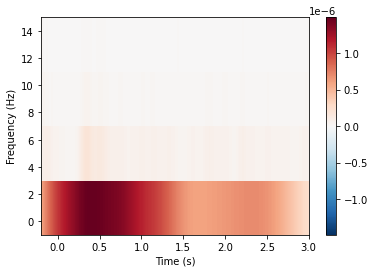

In [189]:
pic[1]

In [100]:
# with open ('Fp1.png') as f:
#     img = f
    
p = Image.open("Fp1_.jpg")
numpydata = np.asarray(p)
  
# <class 'numpy.ndarray'>
print(type(numpydata))
  
#  shape
print(numpydata.shape)

<class 'numpy.ndarray'>
(288, 432, 3)


NameError: name 'imshow' is not defined

In [72]:
ims = np.array([np.array(im) for im in pic])

In [73]:
ims.shape

(2,)

In [44]:
cwt_per_pic.data.shape

(124, 4, 3278)

In [106]:
# channels = cwt_per_pic.ch_names
# channels
cwt_per_pic = cwt_per_pic.data

(124, 4, 3278)

No baseline correction applied


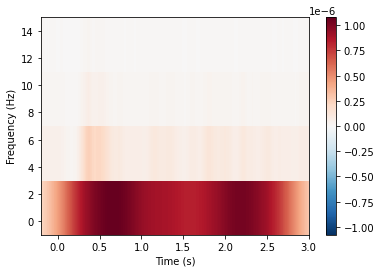

No baseline correction applied


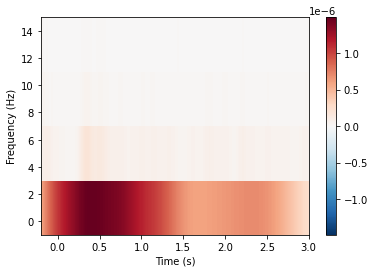

No baseline correction applied


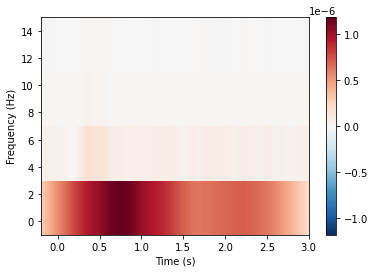

No baseline correction applied


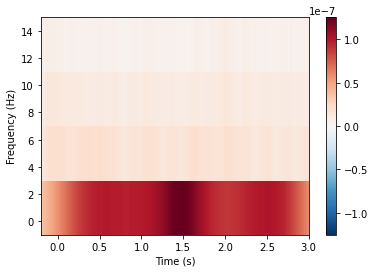

No baseline correction applied


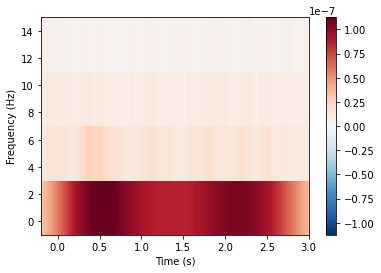

No baseline correction applied


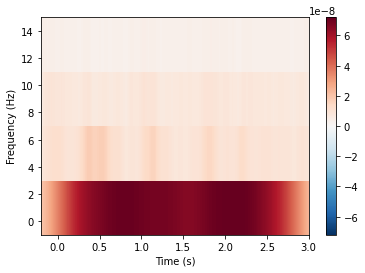

No baseline correction applied


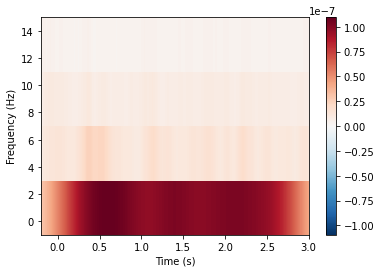

No baseline correction applied


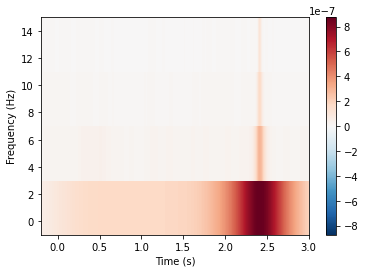

No baseline correction applied


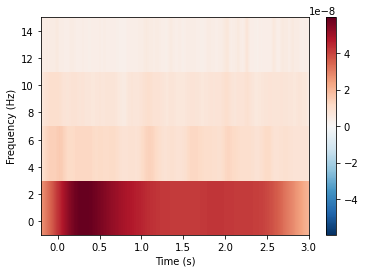

No baseline correction applied


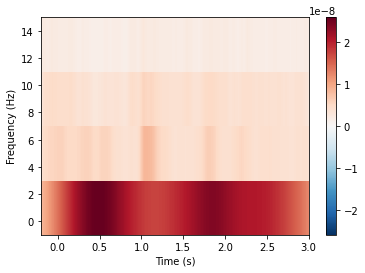

No baseline correction applied


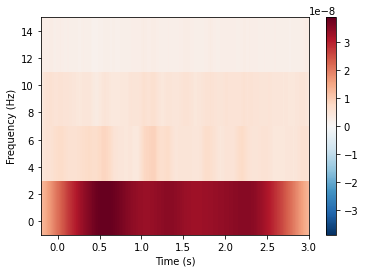

No baseline correction applied


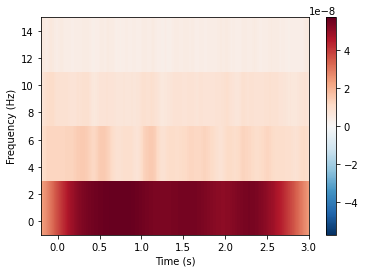

No baseline correction applied


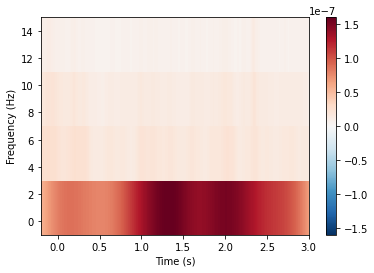

No baseline correction applied


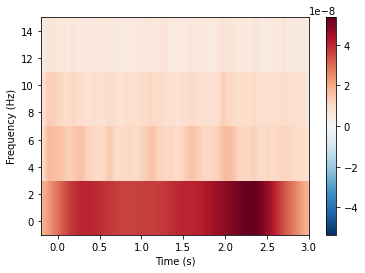

No baseline correction applied


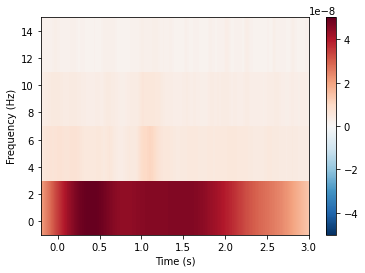

No baseline correction applied


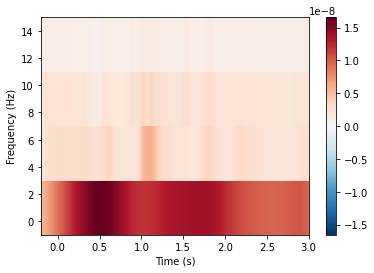

No baseline correction applied


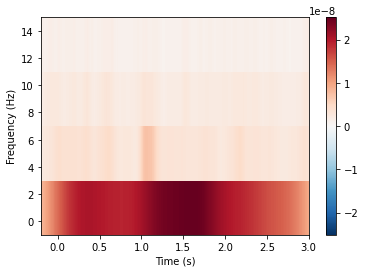

No baseline correction applied


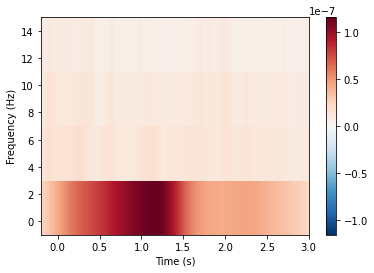

No baseline correction applied


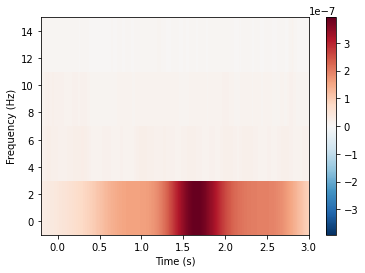

No baseline correction applied


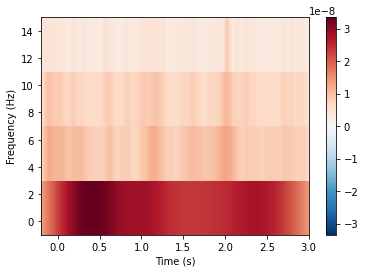

No baseline correction applied


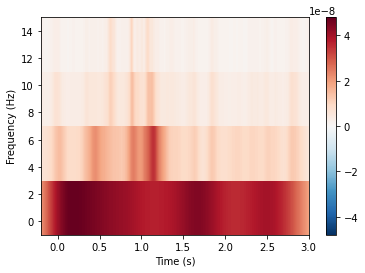

No baseline correction applied


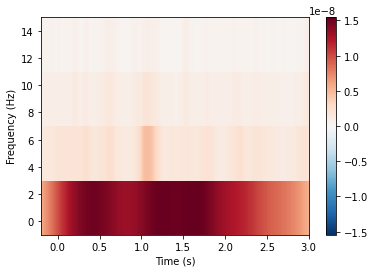

No baseline correction applied


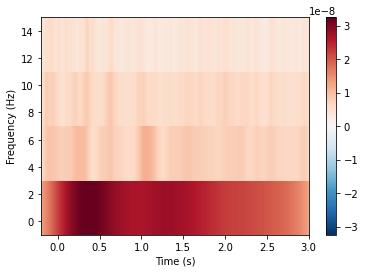

No baseline correction applied


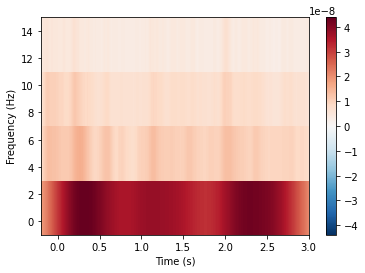

No baseline correction applied


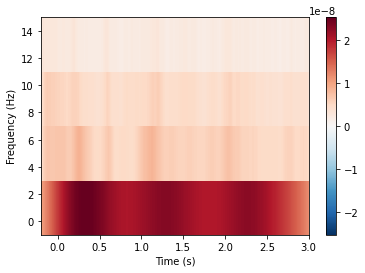

No baseline correction applied


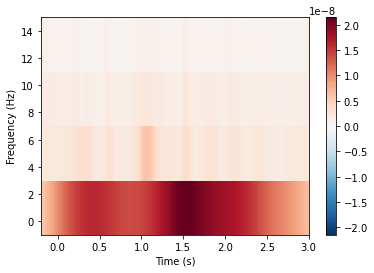

No baseline correction applied


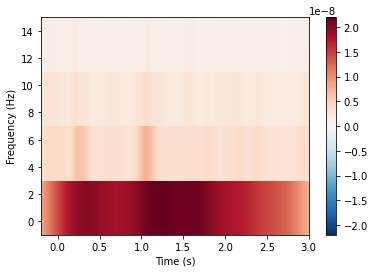

No baseline correction applied


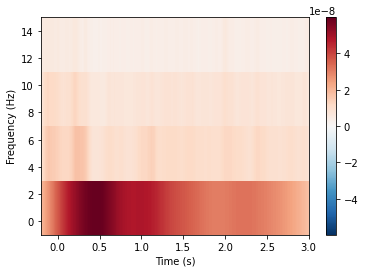

No baseline correction applied


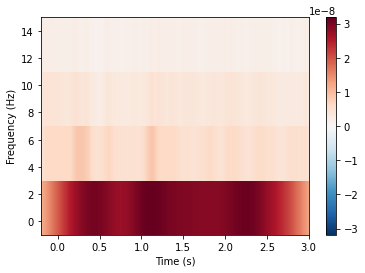

No baseline correction applied


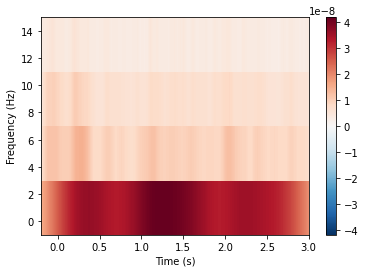

No baseline correction applied


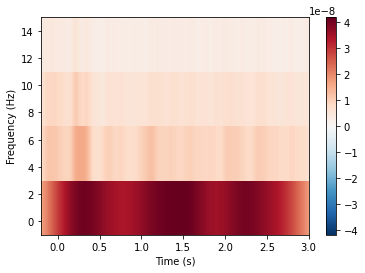

No baseline correction applied


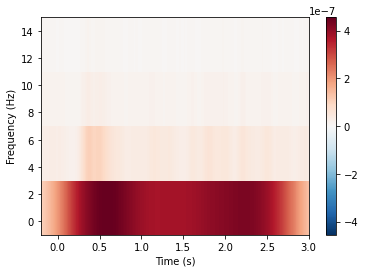

No baseline correction applied


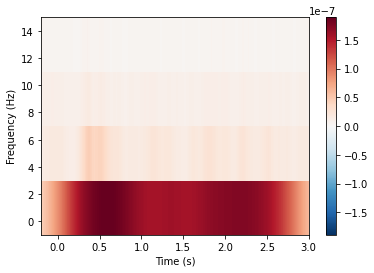

No baseline correction applied


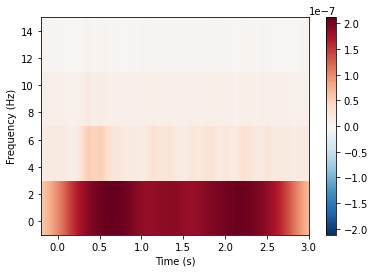

No baseline correction applied


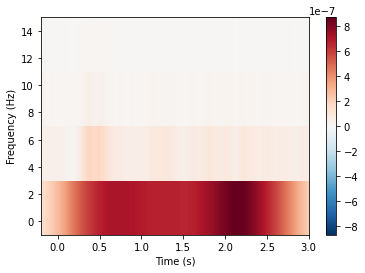

No baseline correction applied


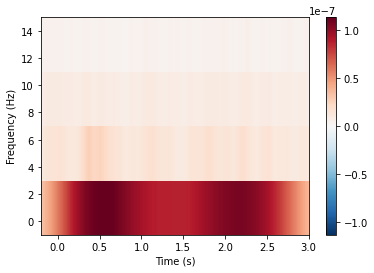

No baseline correction applied


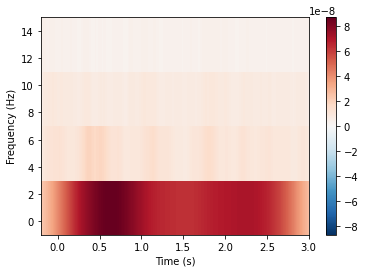

No baseline correction applied


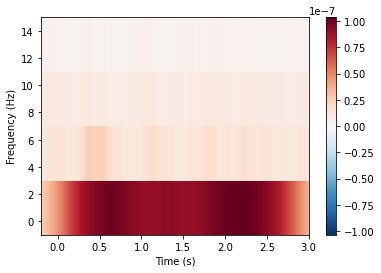

No baseline correction applied


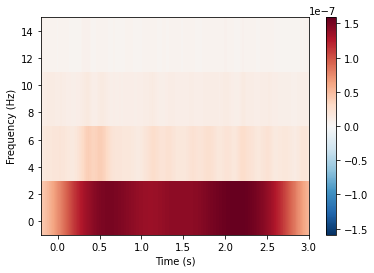

No baseline correction applied


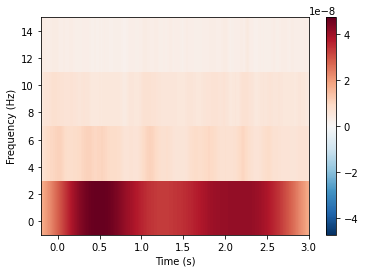

No baseline correction applied


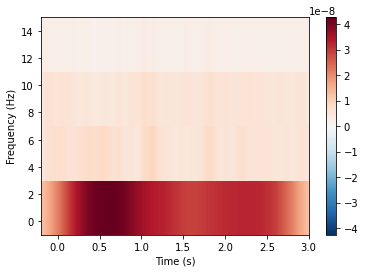

No baseline correction applied


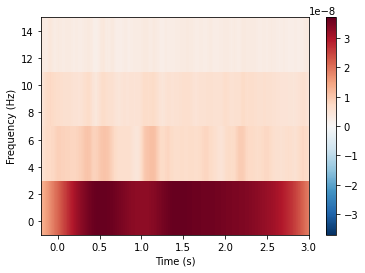

No baseline correction applied


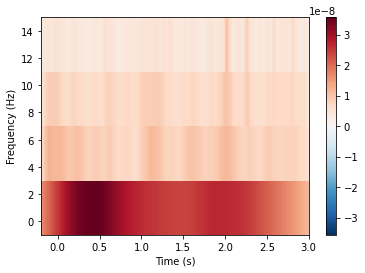

No baseline correction applied


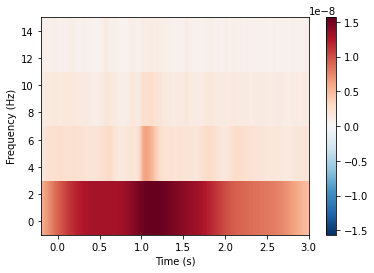

No baseline correction applied


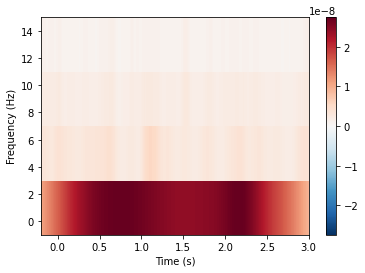

No baseline correction applied


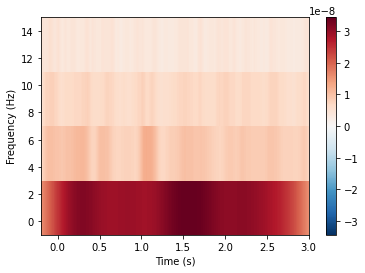

No baseline correction applied


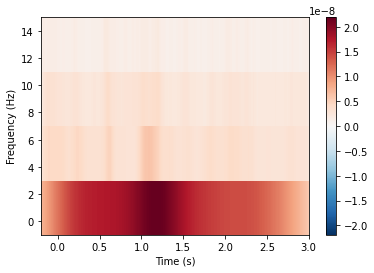

No baseline correction applied


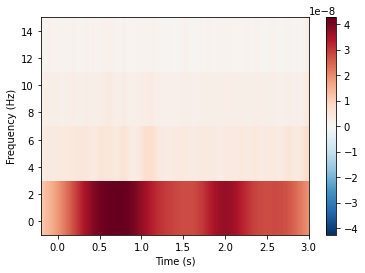

No baseline correction applied


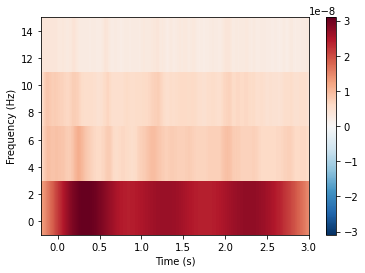

No baseline correction applied


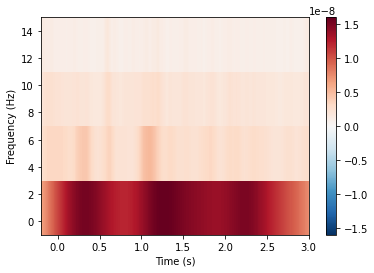

No baseline correction applied


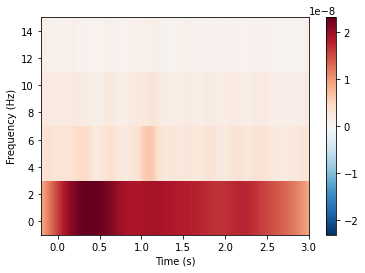

No baseline correction applied


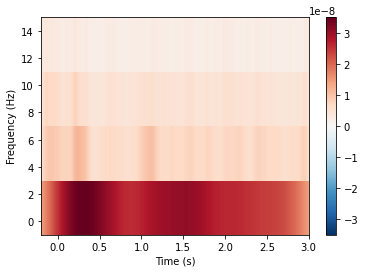

No baseline correction applied


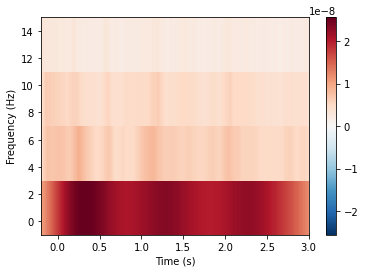

No baseline correction applied


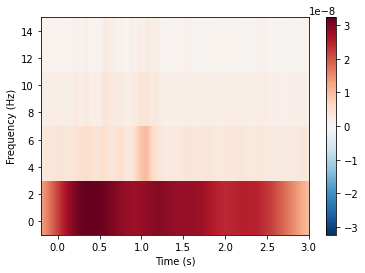

No baseline correction applied


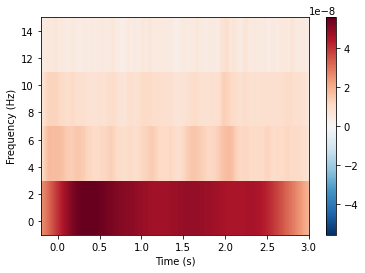

No baseline correction applied


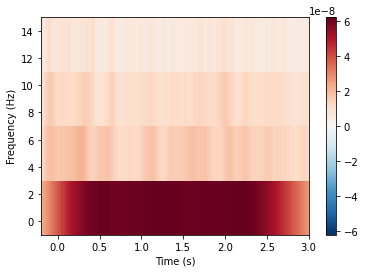

No baseline correction applied


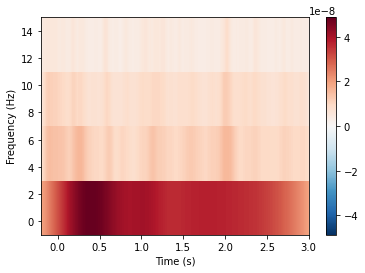

No baseline correction applied


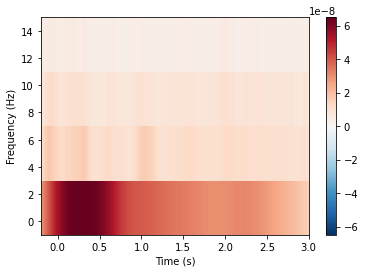

No baseline correction applied


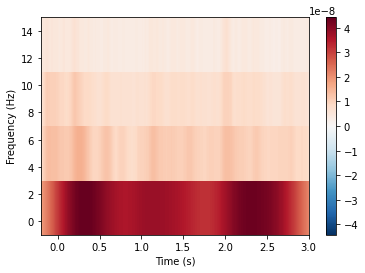

No baseline correction applied


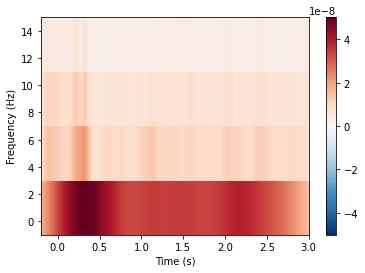

No baseline correction applied


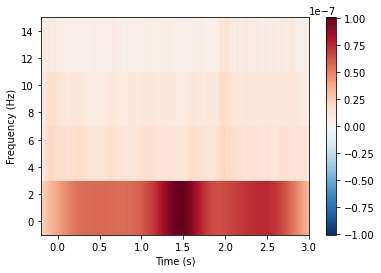

No baseline correction applied


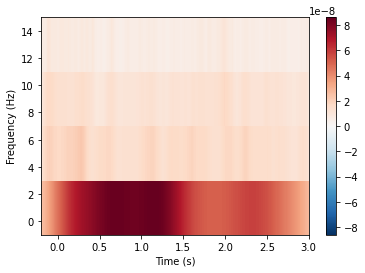

No baseline correction applied


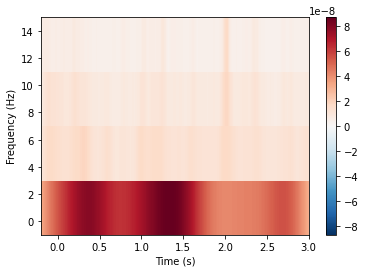

No baseline correction applied


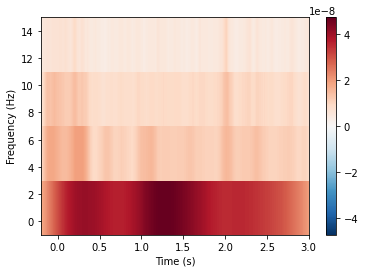

No baseline correction applied


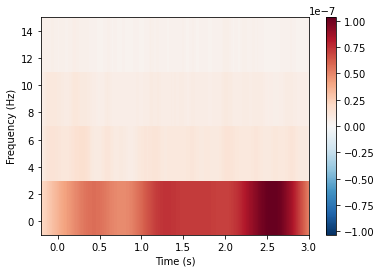

No baseline correction applied


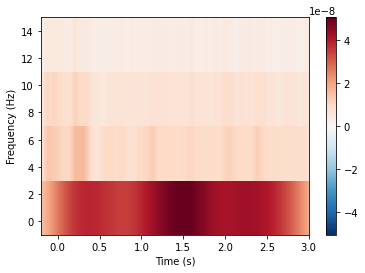

No baseline correction applied


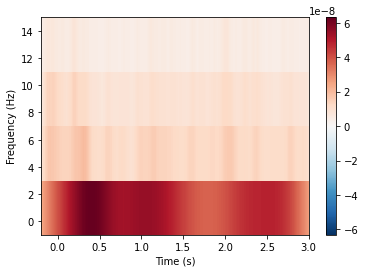

No baseline correction applied


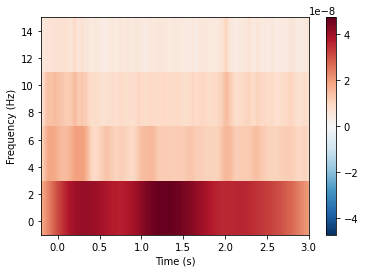

No baseline correction applied


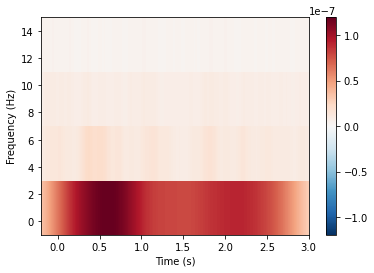

No baseline correction applied


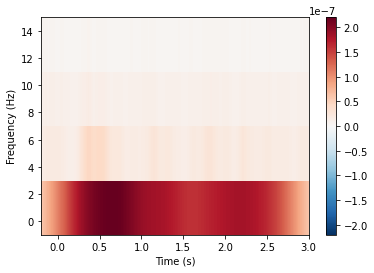

No baseline correction applied


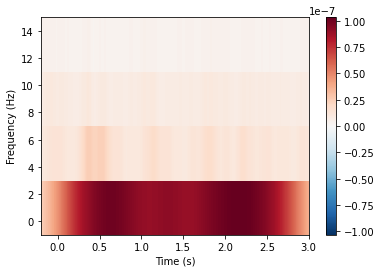

No baseline correction applied


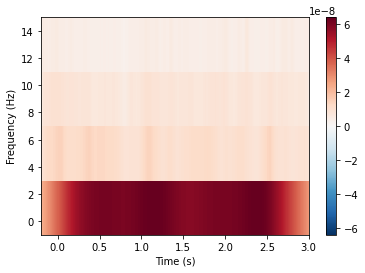

No baseline correction applied


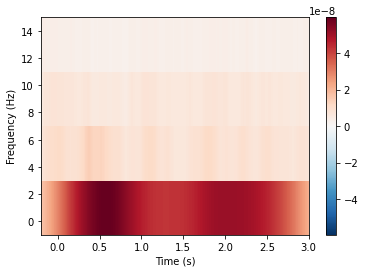

No baseline correction applied


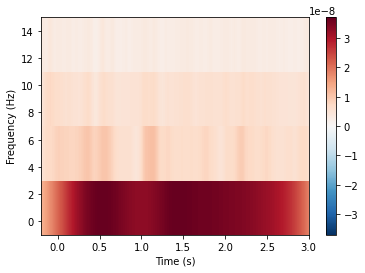

No baseline correction applied


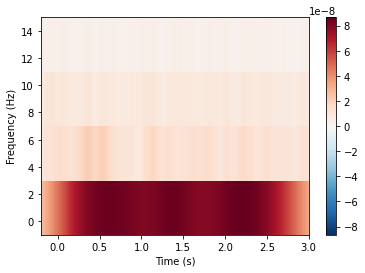

No baseline correction applied


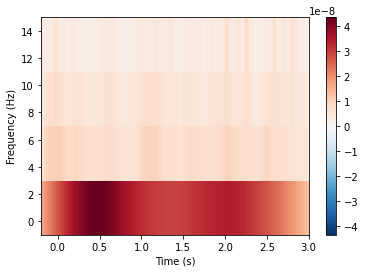

No baseline correction applied


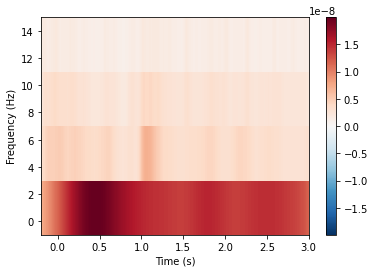

No baseline correction applied


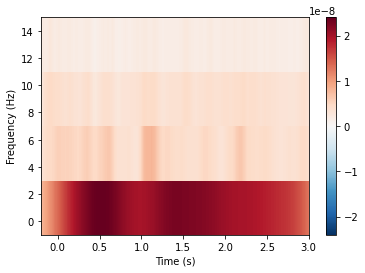

No baseline correction applied


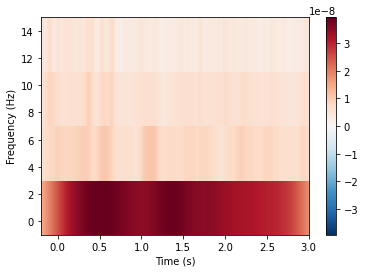

No baseline correction applied


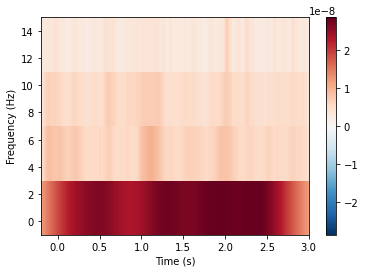

No baseline correction applied


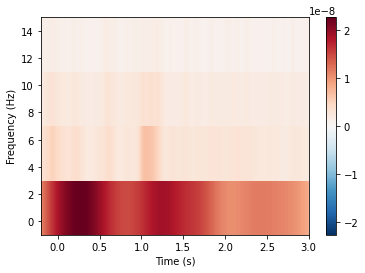

No baseline correction applied


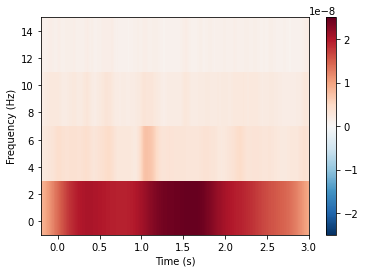

No baseline correction applied


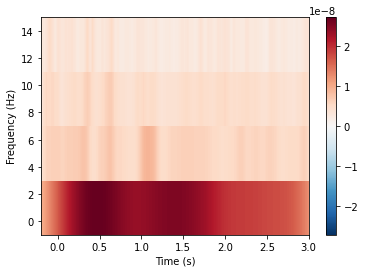

No baseline correction applied


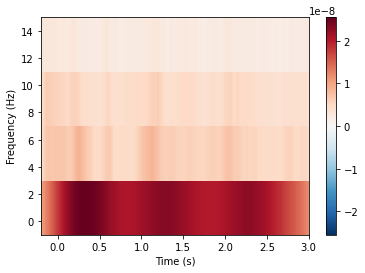

No baseline correction applied


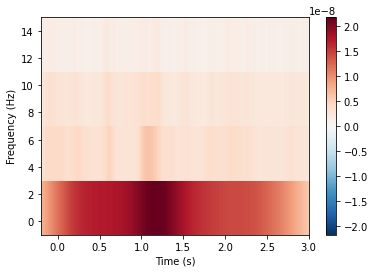

No baseline correction applied


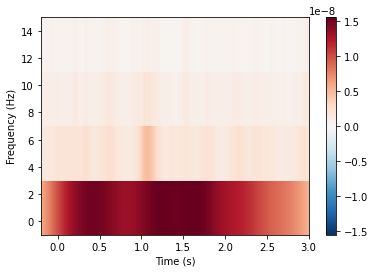

No baseline correction applied


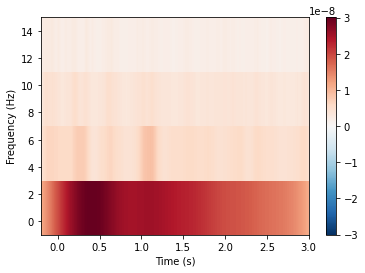

No baseline correction applied


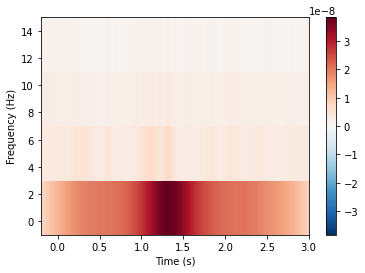

No baseline correction applied


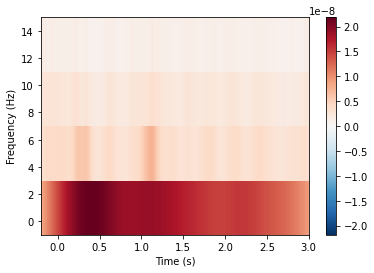

No baseline correction applied


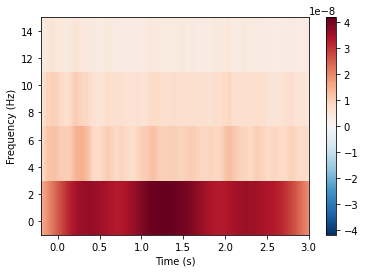

No baseline correction applied


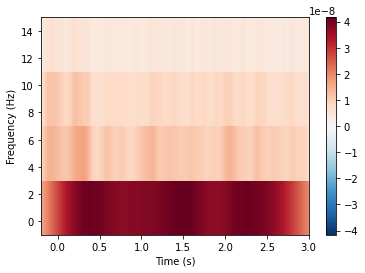

No baseline correction applied


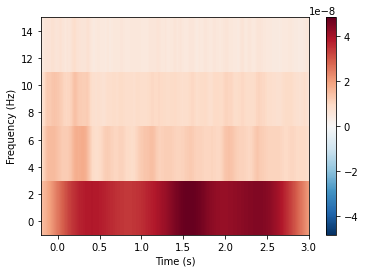

No baseline correction applied


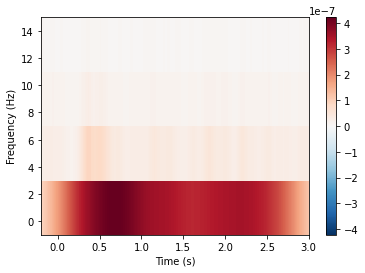

No baseline correction applied


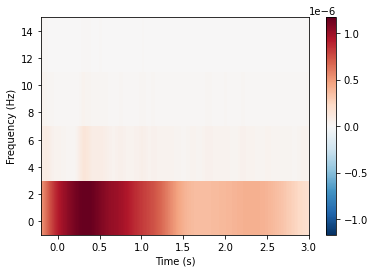

No baseline correction applied


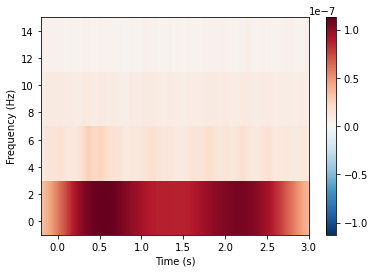

No baseline correction applied


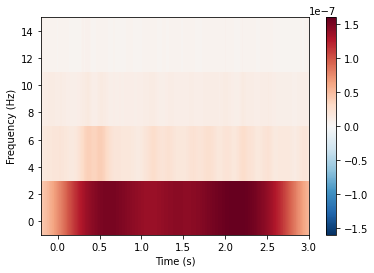

No baseline correction applied


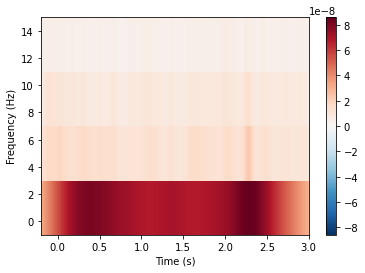

No baseline correction applied


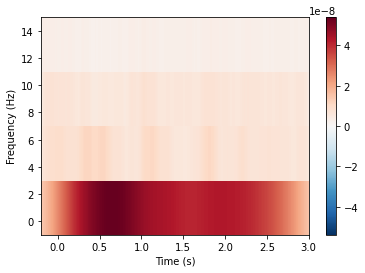

No baseline correction applied


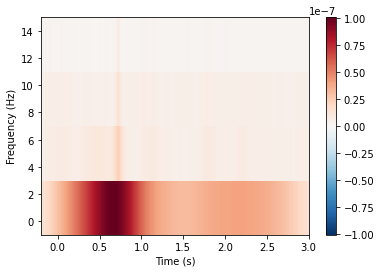

No baseline correction applied


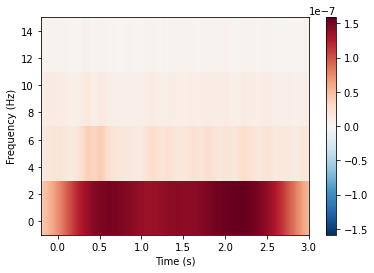

No baseline correction applied


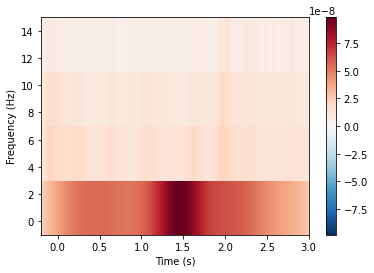

No baseline correction applied


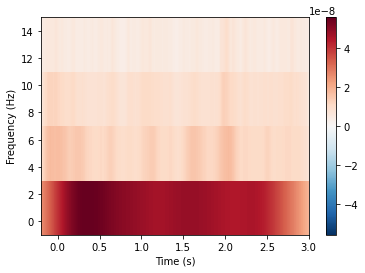

No baseline correction applied


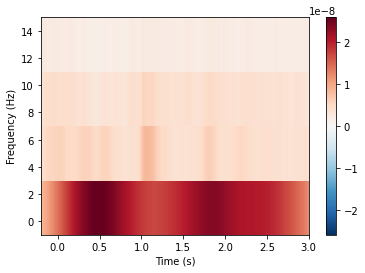

No baseline correction applied


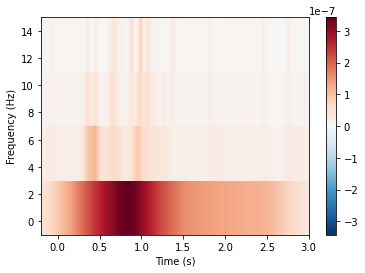

No baseline correction applied


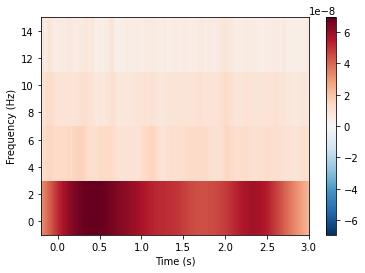

No baseline correction applied


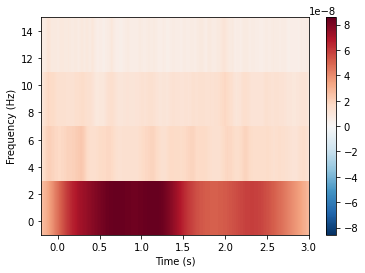

No baseline correction applied


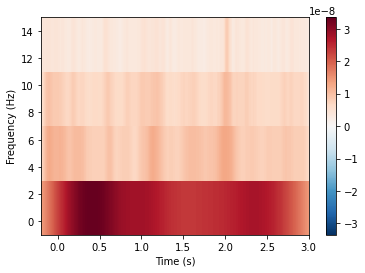

No baseline correction applied


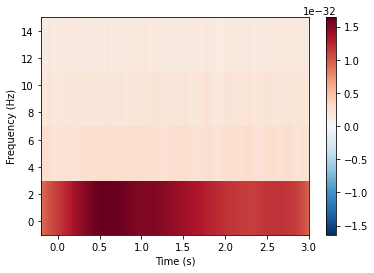

No baseline correction applied


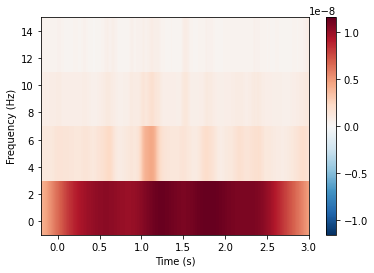

No baseline correction applied


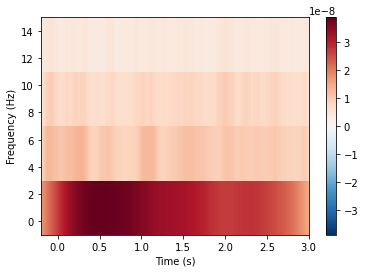

No baseline correction applied


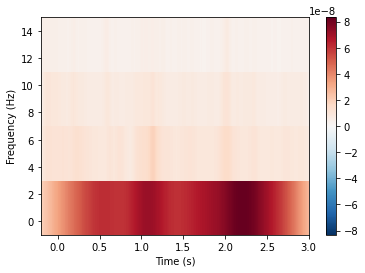

No baseline correction applied


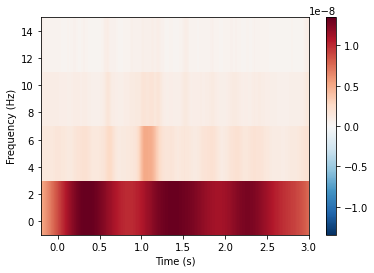

No baseline correction applied


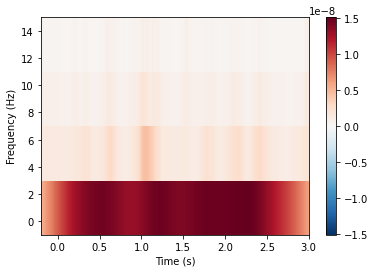

No baseline correction applied


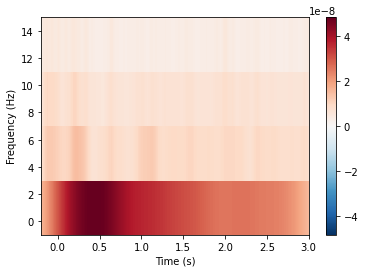

No baseline correction applied


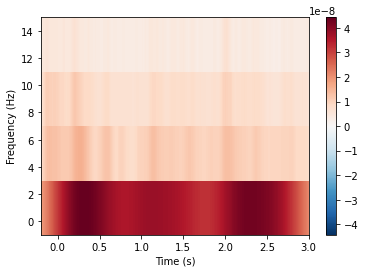

No baseline correction applied


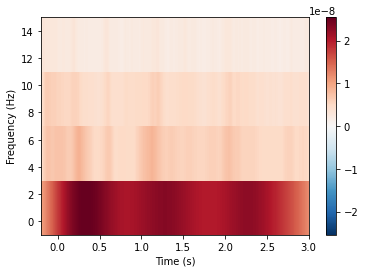

No baseline correction applied


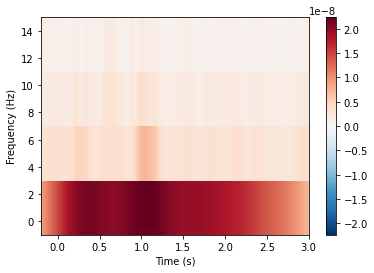

No baseline correction applied


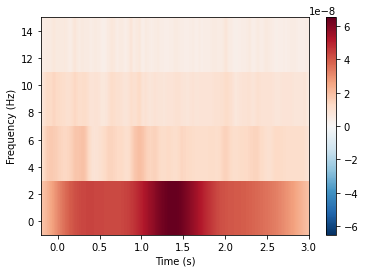

No baseline correction applied


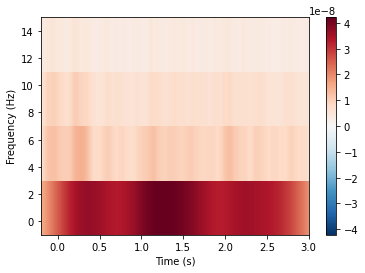

No baseline correction applied


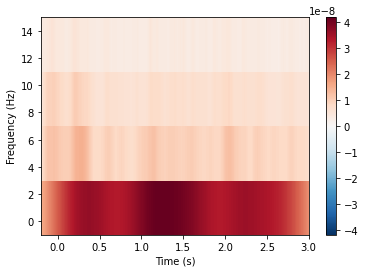

No baseline correction applied


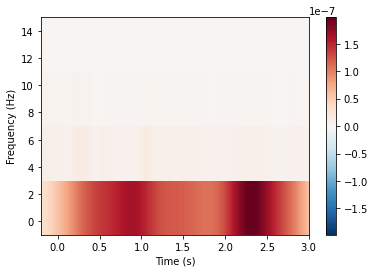

No baseline correction applied


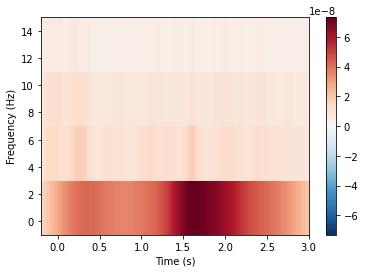

No baseline correction applied


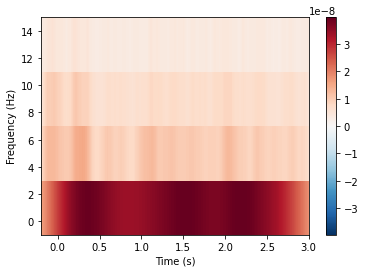

No baseline correction applied


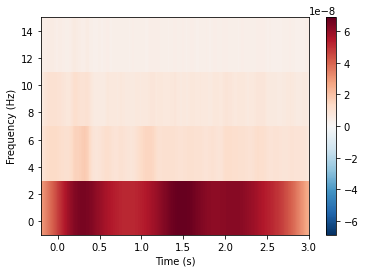

In [44]:
for i in channels:
#     if 'O' in i:
    cwt_per_pic.plot()

In [71]:
epochs

Number of events,150
Events,perc_flower_p: 50perc_guitar_p: 50perc_penguin_p: 50
Time range,-0.200 – 3.000 sec
Baseline,off


In [63]:
coefs , freq = pywt.cwt(epochs,frequencies,'morl')

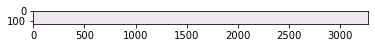

In [79]:
plt.imshow(coefs[0][0], cmap='PRGn')
plt.show() # doctest: +SKIP

In [107]:
coefs.shape

(4, 150, 124, 3278)

In [101]:
mne.time_frequency.tfr_array_morlet?

In [5]:
frequencies = np.arange(1, 16, 1)
cwt_per_pic_ = mne.time_frequency.tfr_array_morlet(X_p_p,sfreq=1024, n_cycles=2,
                                      freqs=frequencies)

NameError: name 'X_p_p' is not defined

In [3]:
#sub_12_data['pre_merge_X']['X_p_p'].shape[1]
# len(sub_12_data['pre_merge_X'])
time = 3073 #sub_12_data['pre_merge_X']['X_p_p'].shape[1]
model = m.cnn(time)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3071, 122, 5)      50        
                                                                 
 batch_normalization (BatchN  (None, 3071, 122, 5)     20        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 3071, 122, 5)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1535, 61, 5)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 1533, 59, 5)       230       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1533, 59, 5)       0

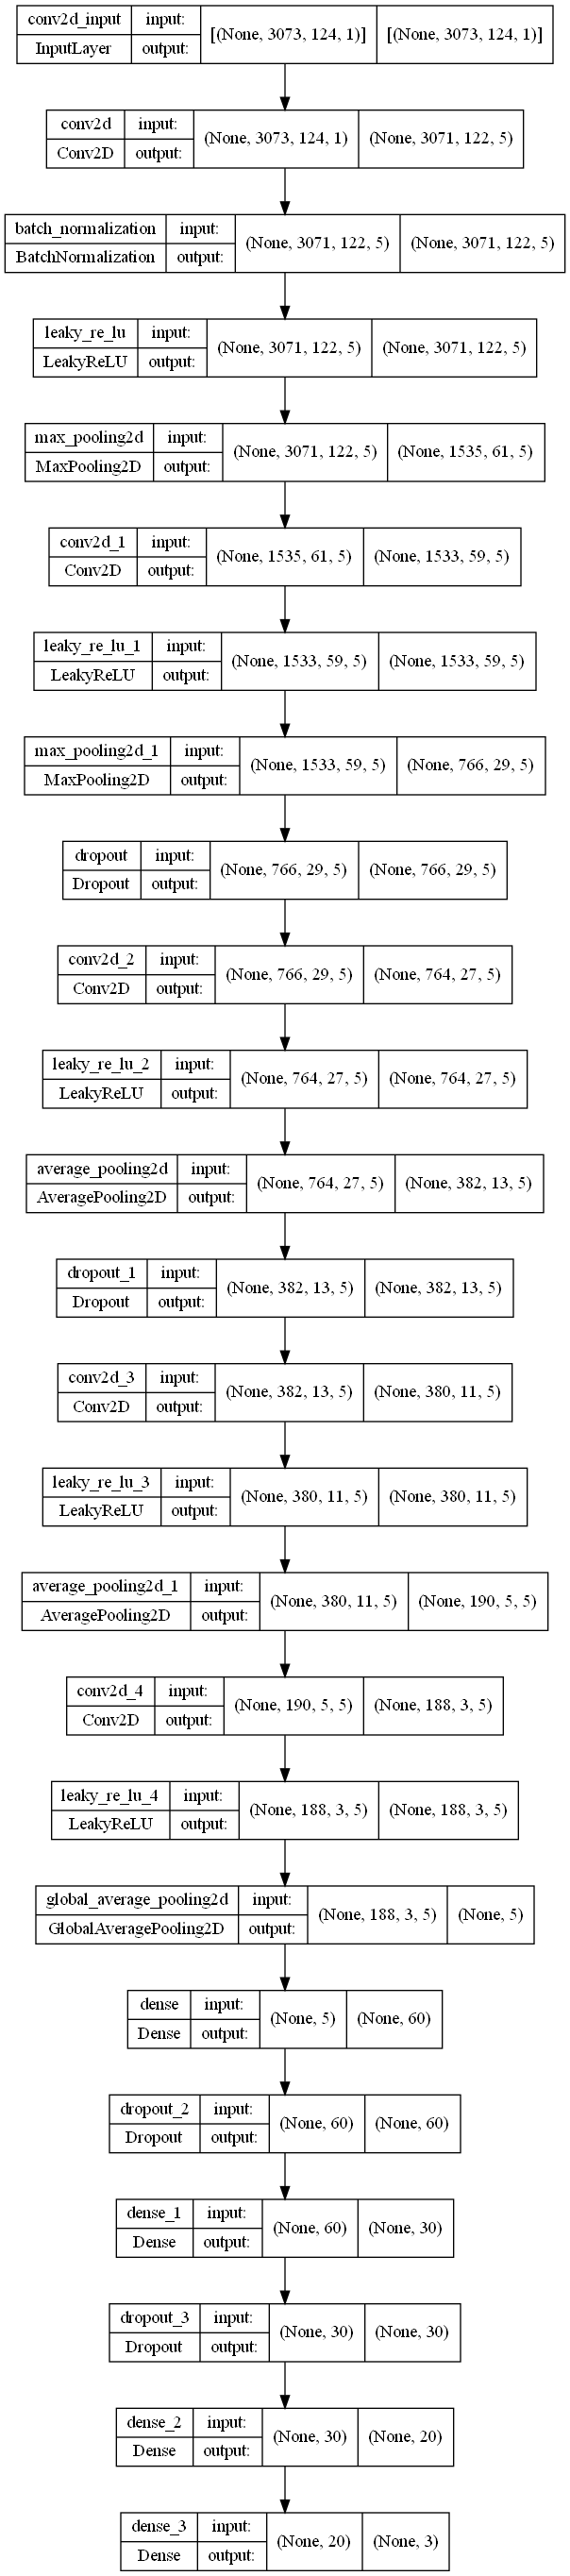

In [5]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [4]:
!pip install pydotplus
#sudo apt-get install graphviz


In [16]:


 

# 2. Freeze the weights of first few layers – Here what we do is we freeze the weights of the first 8 layers of the vgg16 network, while we retrain the subsequent layers. This is because the first few layers capture universal features like curves and edges that are also relevant to our new problem. We want to keep those weights intact and we will get the network to focus on learning dataset-specific features in the subsequent layers.

# Code for freezing the weights of first few layers.

from keras.models import Sequential
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.applications.vgg16 import decode_predictions
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
# from keras.optimizers import adam
from keras.layers import Input, Dense, Convolution2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D, Dropout, Flatten, merge, Reshape, Activation

from sklearn.metrics import log_loss
import tensorflow as tf
# train=pd.read_csv("R/Data/Train/train.csv")
# test=pd.read_csv("R/Data/test.csv")
# train_path="R/Data/Train/Images/train/"
# test_path="R/Data/Train/Images/test/"

# from scipy.misc import imresize

# train_img=[]
# for i in range(len(train)):

#     temp_img=image.load_img(train_path+train['filename'][i],target_size=(224,224))

#     temp_img=image.img_to_array(temp_img)

#     train_img.append(temp_img)

# train_img=np.array(train_img)
# train_img=preprocess_input(train_img)

# test_img=[]
# for i in range(len(test)):

# temp_img=image.load_img(test_path+test['filename'][i],target_size=(224,224))

#     temp_img=image.img_to_array(temp_img)

#     test_img.append(temp_img)

# test_img=np.array(test_img)
# test_img=preprocess_input(test_img)


from keras.models import Model

def vgg16_model(img_rows, img_cols, num_classes=None,channel=1):

    model = VGG16(weights='imagenet', include_top=True)

    model.layers.pop()

    model.outputs = [model.layers[-1].output]

    model.layers[-1].outbound_node = []

    x=Dense(num_classes, activation='softmax')(model.output)

    model=Model(model.input,x)

#To set the first 8 layers to non-trainable (weights will not be updated)

    for layer in model.layers[:8]:
        layer.trainable = False

# Learning rate is changed to 0.001
    #sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=30e-3), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# train_y=np.asarray(train['label'])

# le = LabelEncoder()

# train_y = le.fit_transform(train_y)

# train_y=to_categorical(train_y)

# train_y=np.array(train_y)

# from sklearn.model_selection import train_test_split
# X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.2, random_state=42)

# Example to fine-tune on 3000 samples from Cifar10

img_rows, img_cols = 3073,124 # Resolution of inputs
#channel = 3
num_classes = 3 
batch_size = 16
nb_epoch = 10

# Load our model
model = vgg16_model(img_rows, img_cols, num_classes)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   